# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [319]:
# Import the libraries you'll need here.
# Import the libraries you'll need here.

# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# Provides z-score helper function
import scipy.stats as stats


# Ignore this, this is just for displaying images.
from IPython.display import Image


# Load the csv file into a pandas dataframe.


In [320]:
# Load the csv file into a pandas dataframe.
# Load the csv file into a pandas dataframe.
df = pd.read_csv('data/cars.csv')





# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [321]:
# 1. Print the number of duplicate rows we have in our dataframe.

# 1. Print the number of duplicate rows we have in our dataframe.
df.duplicated().sum()




720

In [322]:
#  2. Modify our df to have all duplicate rows removed. 


df = df[~df.duplicated()]

In [323]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df.duplicated().sum()


0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [324]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()



Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [325]:
# * Print how long (aka how many rows) our dataframe is.
df.shape

(11194, 15)

In [326]:
# * Remove any row that has a null value in it. 
df.dropna(inplace=True)

df.shape

(11092, 15)

In [327]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
df.isnull().sum()



Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

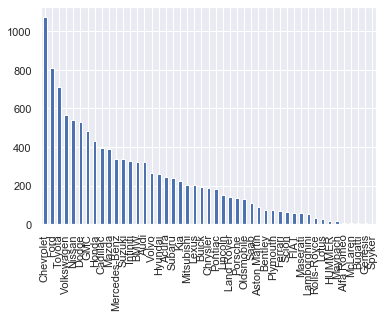

In [328]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

df['Make'].value_counts().plot(kind='bar')



# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

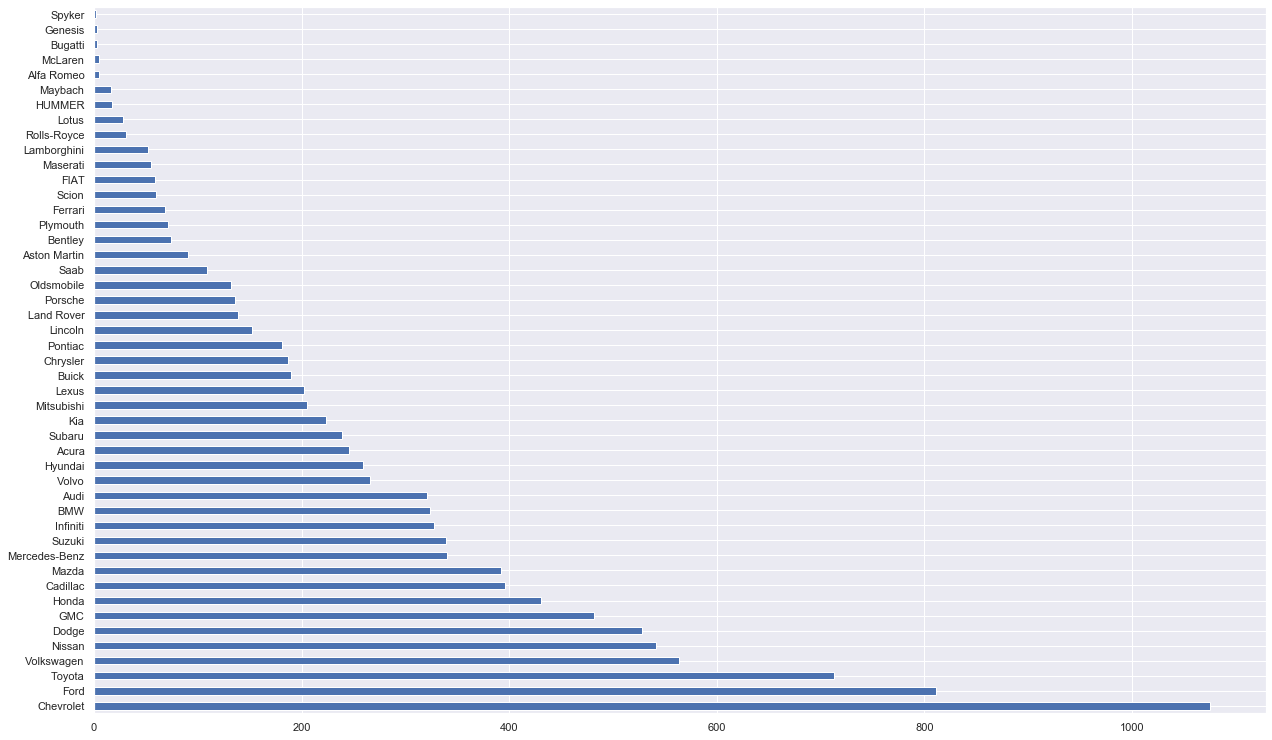

In [329]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

df['Make'].value_counts().plot(kind='barh',figsize=(21,13))


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


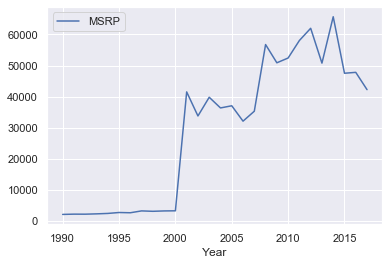

In [330]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.



df.groupby('Year', as_index=False)['MSRP'].mean().set_index('Year').plot()

# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.

In [331]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.
df['adjusted_price'] = df['MSRP']

#df['adjusted_price'] = df['MSRP'].apply(lambda x: 10*df['adjusted_price'] if x condition else df['adjusted_price']
df.loc[df['Year'] <=2000, 'adjusted_price'] = df['adjusted_price']*10 


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

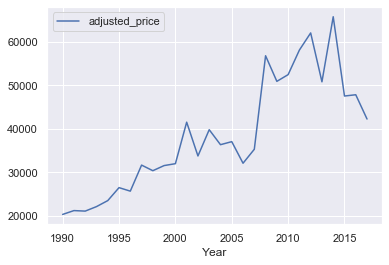

In [332]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000


df.groupby('Year', as_index=False)['adjusted_price'].mean().set_index('Year').plot()

# What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [333]:
# What are the top 5 car makers make the most expensive cars on average. 
avg_df = df.groupby('Make', as_index=False)['adjusted_price'].mean()
avg_df = avg_df.sort_values(by='adjusted_price',ascending=False)
avg_df.head(5)


,Make,adjusted_price
6,Bugatti,1.757224e+06
28,Maybach,5.462219e+05
38,Rolls-Royce,3.511306e+05
22,Lamborghini,3.315673e+05
5,Bentley,2.471693e+05


# What are the top 5 car makers that have the highest median highway MPG?

In [334]:
# Which car makers have the highest median highway MPG?
df.groupby('Make')['highway MPG'].median().sort_values(ascending=False)[:5]




Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

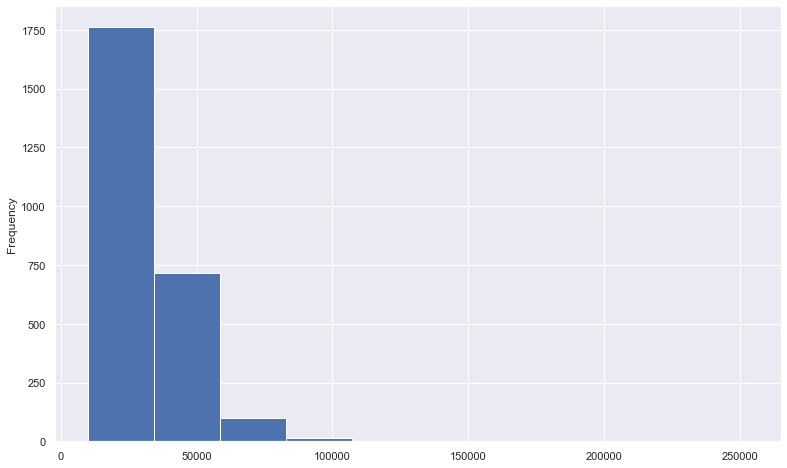

In [335]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
sns.set()
#df[(df['Make'] == 'Chevrolet') | (df.Make == 'Ford') | (df.Make == 'Toyota')]['adjusted_price']

select_condition = df['Make'] == 'Ford'
#df[df['Make'] == 'Chevrolet']['adjusted_price'].plot(kind='hist',bins=10,figsize=(8,5),subplots=True)
#df[df['Make'] == 'Ford']['adjusted_price'].plot(kind='hist',bins=10,figsize=(8,5),subplots=True)
#df[df['Make'] == 'Toyota']['adjusted_price'].plot(kind='hist',bins=10,figsize=(8,5),subplots=True)

df1 = df[(df.Make == 'Chevrolet') | (df.Make == 'Ford') | (df.Make == 'Toyota')]
df1['adjusted_price'].plot(kind='hist',figsize=(13,8))
#df[(df.Make == 'Chevrolet') | (df.Make == 'Ford') | (df.Make == 'Toyota')]['adjusted_price'].plot(kind='hist',figsize=(8,5),bins=10)

# Remake the same histogram, but limit the x-axis from 0 to 100,000

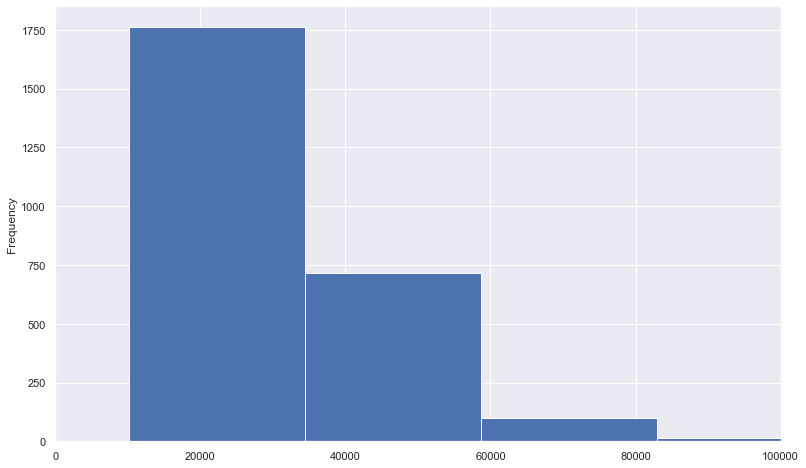

In [336]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

df1['adjusted_price'].plot(kind='hist',figsize=(13,8),xlim=(0,100000))


# Plot the relationship between Engine HP and highway MPG

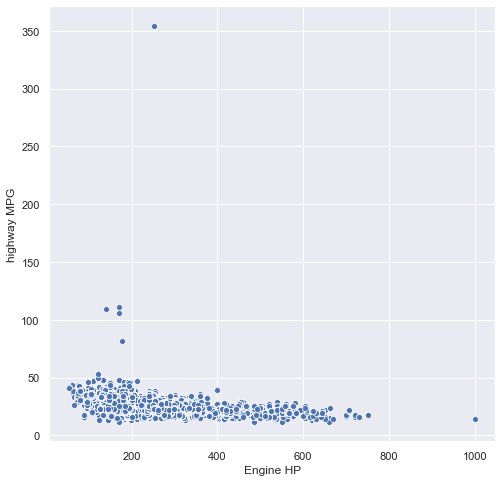

In [337]:
# Plot the relationship between Engine HP and highway MPG

df.columns
#plt.plot(x=df['Engine HP'],y=df['highway MPG'])
#df.plot(x='Engine HP', y='highway MPG',figsize=(13,8),style='o')
plt.figure(figsize=(8,8))
ax = sns.scatterplot(data=df, x='Engine HP', y='highway MPG');

# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

/Users/chris.christie92/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


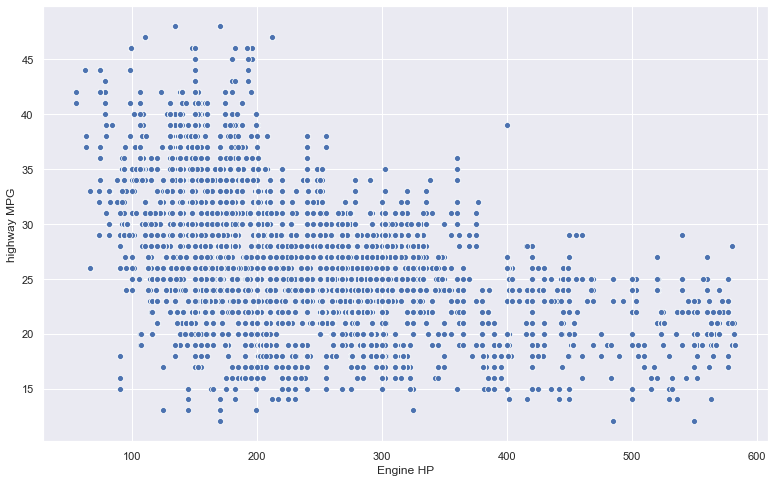

In [352]:
# Remove any statisical outliers from Engine HP and highway MPG
df['Engine HP_zscore'] = stats.stats.zscore(df['Engine HP'])
df['highway MPG_zscore'] = stats.stats.zscore(df['highway MPG'])
new_df = df.copy()
z_score_cols = ['Engine HP_zscore','highway MPG_zscore']


c1 = new_df['Engine HP_zscore'] < 3
c2 = new_df['highway MPG_zscore'] < 3


new_df = new_df[c1]
new_df = new_df[c2]
condition = new_df[z_score_cols] < 3

# Say if any of the rows is true, set to true, else set to false
condition = condition.any(axis=1)

# Apply our condition mask
new_df = new_df[condition]

plt.figure(figsize=(13,8))

ax = sns.scatterplot(data=new_df, x='Engine HP', y='highway MPG');

# What does this plot tell you about how Engine HP affects highway MPG?

In [355]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('MORE HORSEPOWER MEANS LESS HIGHWAY MILES PER GALLON')

MORE HORSEPOWER MEANS LESS HIGHWAY MILES PER GALLON


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

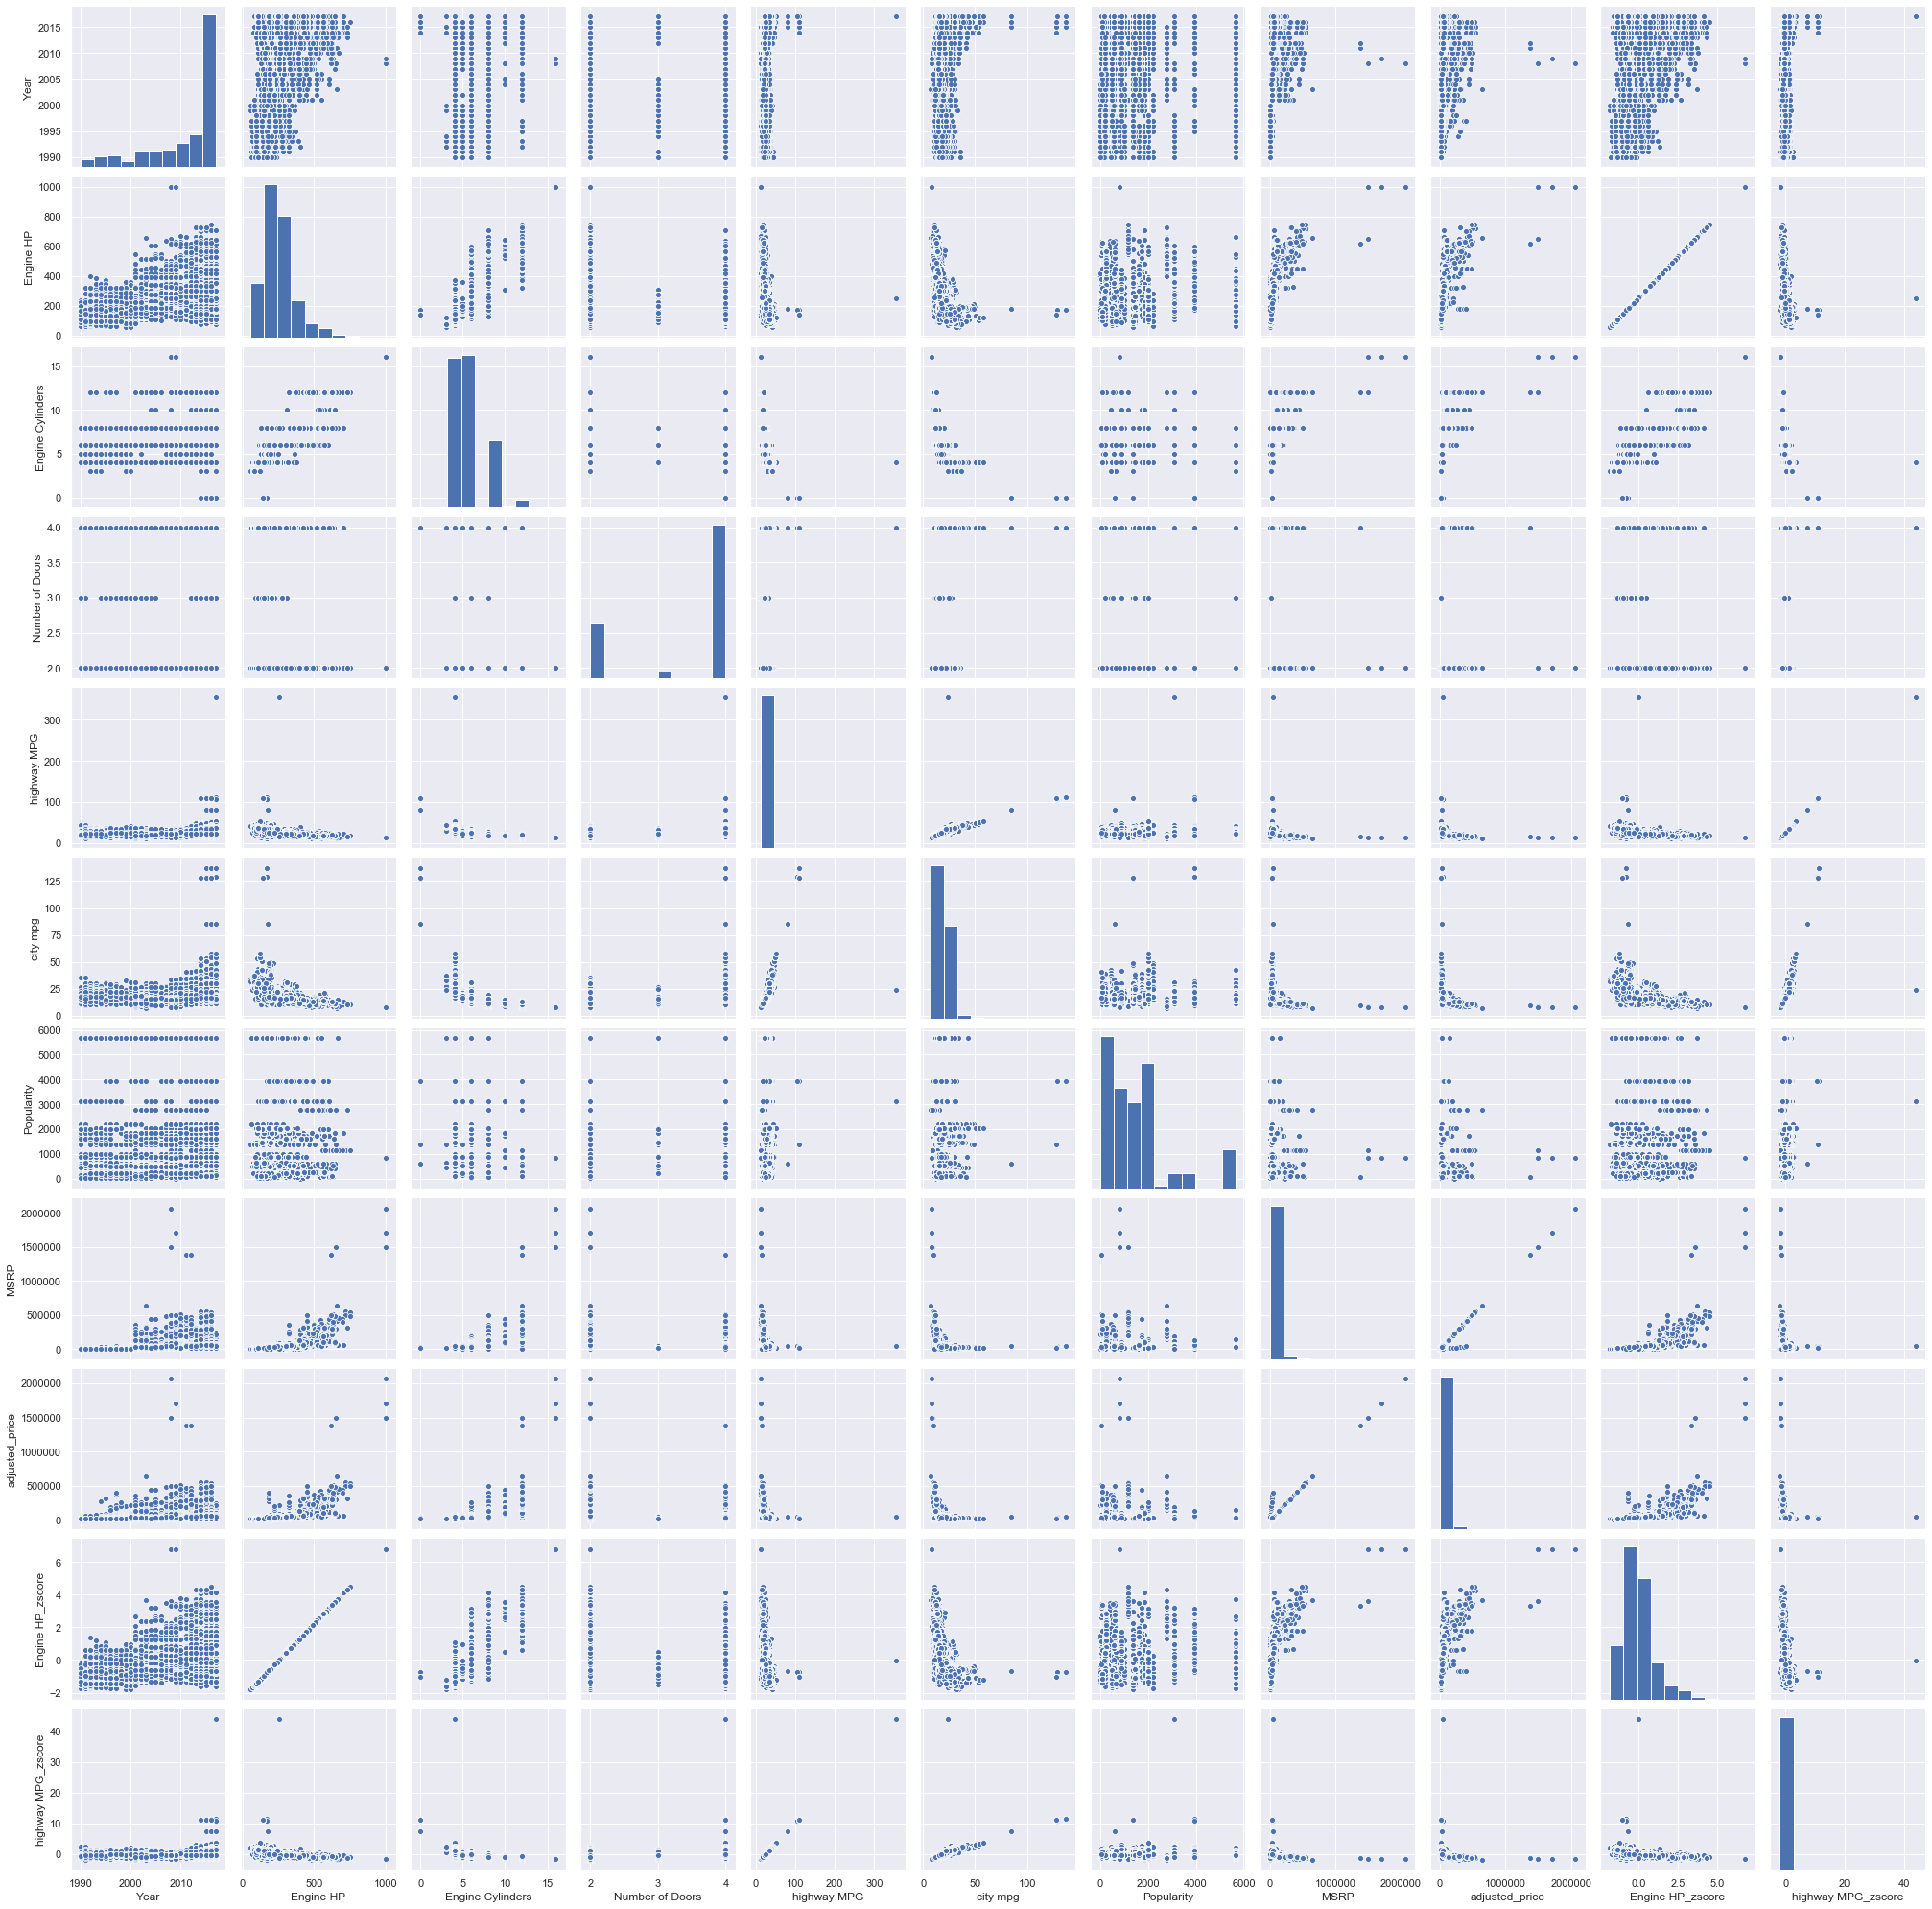

In [354]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df);


In [366]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

#highway/city mpg/msrp/horsepower increases with year
#msrp/cylinders increases with horsepower


YOUR ANSWER HERE


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

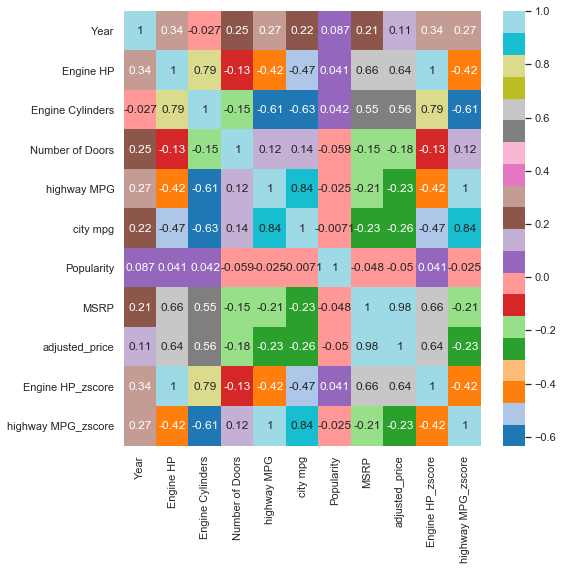

In [365]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.figure(figsize=(8,8))

sns.heatmap(df.corr(),annot=True,cmap='tab20')

#engine hp and engine cylinders have the strongest relationship
# more cylinders more power 

# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [343]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well


